In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('silhouette.jpg', 0)
# imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 127, 255, 0)
_, contours, hierarchy = cv2.findContours(thresh, 1, 2)

In [2]:
cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'m00': 8498.0, 'm10': 2397271.333333333, 'm01': 3821994.6666666665, 'm20': 686816349.0, 'm11': 1076499867.8333333, 'm02': 1723533834.0, 'm30': 199550075882.0, 'm21': 308038006559.4667, 'm12': 484740117267.0, 'm03': 779232301628.4, 'mu20': 10550186.888706088, 'mu11': -1678321.2173712254, 'mu02': 4583112.415104389, 'mu30': -152026483.4472046, 'mu21': 87707645.32059288, 'mu12': 43814278.673527956, 'mu03': -53457818.77307129, 'nu20': 0.14609208907081161, 'nu11': -0.023240294732608375, 'nu02': 0.0634639437416724, 'nu30': -0.02283638903814592, 'nu21': 0.013174848649685099, 'nu12': 0.006581484294885347, 'nu03': -0.008030071596416997}


In [3]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx)
print(cy)

282
449


In [4]:
area = cv2.contourArea(cnt)
print(area)

8498.0


In [5]:
perimeter = cv2.arcLength(cnt, True)
print(perimeter)

433.0193328857422


In [6]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
print(approx)

[[[329 411]]

 [[198 482]]

 [[345 489]]]


In [7]:
k = cv2.isContourConvex(cnt)
print(k)

False


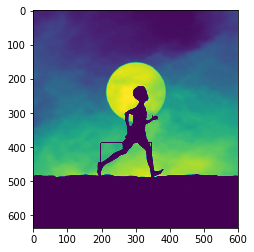

In [8]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

In [9]:
print(len(contours))

4


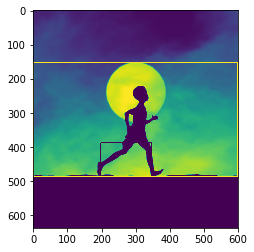

In [11]:
cnt = contours[3]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(img,[box],0,(255,255,255),2)
plt.imshow(im)

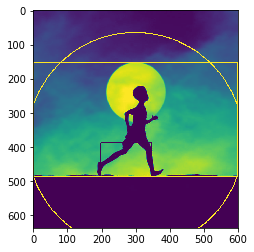

In [12]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(255,255,255),2)
plt.imshow(img)

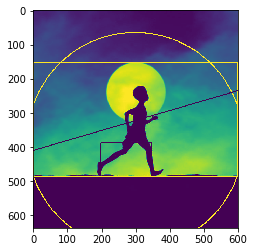

In [13]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)
plt.imshow(img)